# Build a Linear Regression Model Using Qulaitative & Quanititative Predictors and Evalute the Model Performance

 ## [Total 20 Marks]

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Read the data from Galton.csv

In [2]:
df = pd.read_csv('Galton.csv')

## Run the following commands to know more about your data

### Explore the data types of each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    int64  
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 58.5+ KB


In [4]:
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


### Explore the distribution of the target label

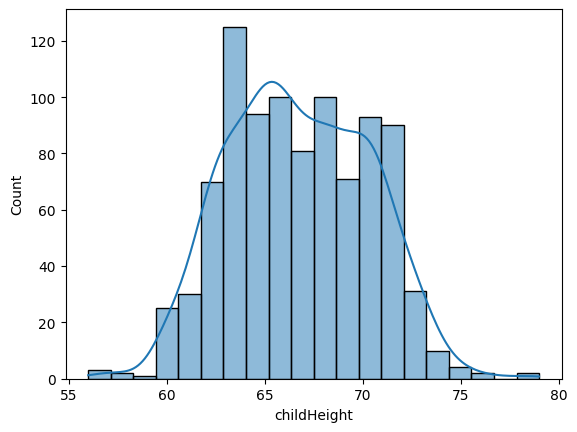

In [5]:
sns.histplot(x=df['childHeight'],kde=True)
plt.show()

### Use OneHotEncoder to cretae dummy variables of the categorical features [5 Marks]

In [6]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['family','children', 'childNum','gender']])

In [7]:
encoded_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Use the numerical and encoded categorical features to create a linear regreeion model to predict childHeight [10 Marks]

In [8]:
X_all = np.hstack((df[['mother','father']].values, encoded_data))
y_all = df['childHeight'].values

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(X_all, y_all)

LinearRegression()

### Evalute the prediction using MSE, RMSE, MAE, and r2_score [5 Marks]

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
ypred = lr.predict(X_all)
print('MAE:', mean_absolute_error(y_all, ypred))
print('MSE:', mean_squared_error(y_all, ypred))
print('RMSE:', np.sqrt(mean_squared_error(y_all, ypred)))
print('r2_score:', r2_score(y_all, ypred))

MAE: 0.9414999330835118
MSE: 1.6242020618698583
RMSE: 1.2744418628834577
r2_score: 0.8730826688348793
